In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1.輸入Fashion MNIST數據集

In [6]:
from tensorflow.keras.datasets import fashion_mnist 

In [7]:
(x_train, y_train),(x_test, y_test) =fashion_mnist.load_data()

### 2.欣賞數據集內容

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
len(x_train) 

60000

In [10]:
len(x_test)

10000

這是 Trouser


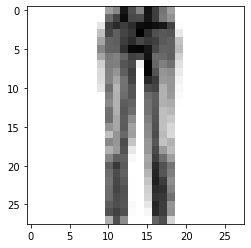

In [11]:
n = 6666
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

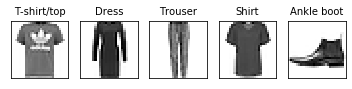

In [12]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [13]:
pick

array([20151, 54295, 49173,  3533, 13340])

### 3.資料整理

In [14]:
x_train= x_train/255
x_test= x_test/255

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train= x_train.reshape(60000,784)
x_test= x_test.reshape(10000,784)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

### 4.打造神經網路

* 第一層與第二層都以64個神經元為此神經網路的架構
* 而learning rate設為0.05566

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD

In [20]:
mymodel= Sequential()

In [21]:
mymodel.add(Dense(64, input_dim=784, activation='relu')) 

In [22]:
mymodel.add(Dense(64, activation='relu'))

In [23]:
mymodel.add(Dense(10, activation='softmax'))

In [24]:
mymodel.compile(loss='mse', optimizer=SGD(lr=0.05566), metrics=['accuracy'])

In [25]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### 5.訓練

* batch size設為100，epochs設為20
* 定義一個函數:說明神經網路辨別的結果，並將矩陣視覺化

In [26]:
mymodel.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0820 - accuracy: 0.3724
Epoch 2/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0583 - accuracy: 0.6160
Epoch 3/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0453 - accuracy: 0.6832
Epoch 4/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0392 - accuracy: 0.7367
Epoch 5/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0355 - accuracy: 0.7697
Epoch 6/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0329 - accuracy: 0.7875
Epoch 7/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0311 - accuracy: 0.7978
Epoch 8/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0297 - accuracy: 0.8058
Epoch 9/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0285 - accuracy: 0.8121
Epoch 10/20
60

In [27]:
result= mymodel.predict_classes(x_test)

In [28]:
def show_result(p):
    print('神經網路說是:',class_names[result[p]])
    plt.imshow(x_test[p].reshape(28,28),cmap='Greys')

神經網路說是: Sneaker


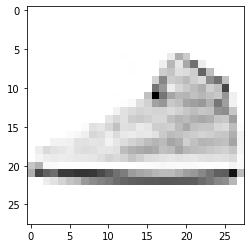

In [29]:
show_result(45)

神經網路說是: T-shirt/top


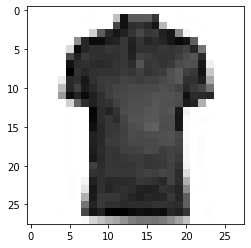

In [30]:
show_result(4561)